<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1Assignments/blob/main/Copy_of_U1W2_09_LC_Fruits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

The objective of this experiment is to understand Linear classifier

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 69 records. Each record represents the following details of fruits : 

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* Sphericity -   is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

* Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Green as 20
     - Greenish Yellow as 40
     - Orange as 60
     - Red as 80
     - Reddish Yellow as 100

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




## Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U1W2_09_LC_Fruits_data" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


## Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

## Load the data

In [ ]:
fruits_data = pd.read_csv("fruits_weight_sphercity.csv")
fruits_data.head()

In [ ]:
fruits_data['Color'] = fruits_data['Color'].replace(['Green', 'Greenish yellow','Orange', 'Red','Reddish yellow'],[20, 40, 60, 80, 100])  
fruits_data['labels'] = fruits_data['labels'].replace(['apple','orange'],[1, 0])

**To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()**

In [ ]:
fruits_data.head()

In [ ]:
fruits_data.tail()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(fruits_data['Weight'])
plt.show()

plt.boxplot(fruits_data['Weight'])
plt.show()

In [ ]:
fruits_data.shape
fruits_data.columns
fruits_data.head()

In [ ]:
from scipy.stats import skewnorm
from matplotlib import pyplot as plt
import seaborn as sns

#sns.distplot(fruits_data["Weight"], kde = False).set_title("Histogram for Weight")
# plt.show()

sns.scatterplot(fruits_data["Weight"],fruits_data["Sphericity"])
plt.show()

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [13]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.__version__


profile = ProfileReport(fruits_data)
profile
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

There are a few noisy samples in the data which is skew in the accuracies. So here is the code to drop them. However before un-commenting the code below, go through the experiment and visualize those noisy samples and then re-run the experiment after un-commenting the lines below.

In [14]:
fruits_data = fruits_data.drop(fruits_data[(fruits_data['labels'] == 1) & (fruits_data['Weight'] > 325)].index)
fruits_data = fruits_data.drop(fruits_data[(fruits_data['labels'] == 0) & (fruits_data['Weight'] < 290)].index)
fruits_data.head()
# To understand the above code properly look at the plot and also try to drop the noisy data of class 0 & class 1.

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


## Store data and labels in two seperate variables


In [36]:
data = fruits_data[["Weight", "Color", "Sphericity"]] 

In [37]:
labels = fruits_data["labels"]

In [17]:
data.shape, type(data)

((60, 3), pandas.core.frame.DataFrame)

## Visualizing the data

 Plot 2 parameters (out of the three) for visualization. (If you're interested in plotting in 3-D, which might be of help here, you can explore Matplotlib's Axes3D [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html))

In [18]:
apples = fruits_data[fruits_data['labels']== 1] # apples are 1
oranges = fruits_data[fruits_data['labels']== 0] # oranges are 0 

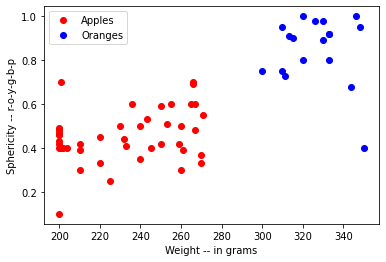

In [19]:
plt.plot(apples.Weight, apples.Sphericity, "ro")
plt.plot(oranges.Weight, oranges.Sphericity, "bo")

plt.xlabel("Weight -- in grams")
plt.ylabel("Sphericity -- r-o-y-g-b-p")

plt.legend(["Apples", "Oranges"])

plt.show()

## Split the data into train and test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [21]:
# The size of train and test sets
X_train.shape, X_test.shape

((48, 3), (12, 3))

## Train a  Linear Classifier 

In [30]:
linear_classifier = SGDClassifier(random_state=42)

In [31]:
# Fit the model with the train data
linear_classifier.fit(X_train, y_train)

# Test the trained model
y_pred = linear_classifier.predict(X_test)

In [32]:
# Calculate the score
linear_classifier.score(X_test, y_test)

0.9166666666666666

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9166666666666666

Not happy with the accuracies? How about trying to see which exact samples caused the accuracies to drop? (Especially given that this is a small dataset which can be doable. This sort of analysis is infeasible on large-datasets)

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[3 0]
 [1 8]]


In [56]:
# By seeing the confusion matrix its pretty clear that there is only one row which gave false results
# Let us find out that particular sample
y_test_df = pd.DataFrame(y_test)
final_df_with_predicted_values = pd.concat([X_test,y_test_df],axis=1)
final_df_with_predicted_values["Actual_Label"] = y_pred
final_df_with_predicted_values

row_with_discrepancy = final_df_with_predicted_values[final_df_with_predicted_values['Actual_Label'] != final_df_with_predicted_values['labels']]
row_with_discrepancy

,Weight,Color,Sphericity,labels,Actual_Label
12,259,20,0.42,1,0


# Please answer the questions below to complete the experiment:

In [57]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [58]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything looks good" #@param {type:"string"}


In [59]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [60]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [61]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 391
Date of submission:  22 May 2022
Time of submission:  16:54:20
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
